In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
import joblib
import os
import pickle

<>:2: SyntaxWarning: invalid escape sequence '\O'
<>:2: SyntaxWarning: invalid escape sequence '\O'
C:\Users\NARASAREDDY\AppData\Local\Temp\ipykernel_13340\504871478.py:2: SyntaxWarning: invalid escape sequence '\O'
  df = pd.read_csv('N:\Overian_cancer_prediction\Overian_cancer_prediction\database\original data.csv')
C:\Users\NARASAREDDY\AppData\Local\Temp\ipykernel_13340\504871478.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\NARASAREDDY\AppData\Local\Temp\ipyker

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SUBJECT_ID  349 non-null    int64  
 1   AFP         325 non-null    float64
 2   AG          348 non-null    float64
 3   Age         349 non-null    int64  
 4   ALB         339 non-null    float64
 5   ALP         339 non-null    float64
 6   ALT         339 non-null    float64
 7   AST         339 non-null    float64
 8   BASO#       349 non-null    float64
 9   BASO%       349 non-null    float64
 10  BUN         349 non-null    float64
 11  Ca          349 non-null    float64
 12  CA125       330 non-null    float64
 13  CA19-9      315 non-null    float64
 14  CA72-4      109 non-null    float64
 15  CEA         327 non-null    float64
 16  CL          349 non-null    float64
 17  CO2CP       348 non-null    float64
 18  CREA        349 non-null    float64
 19  TYPE        349

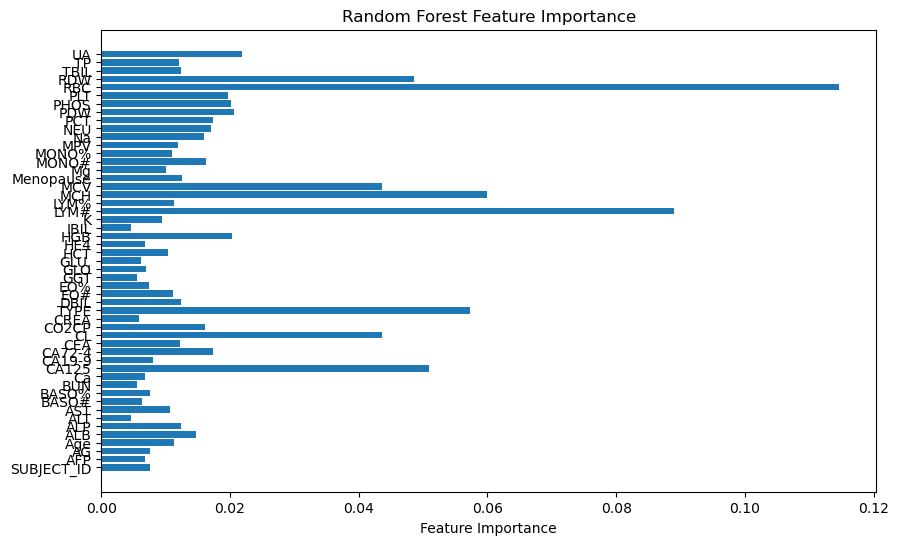

In [46]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [48]:
# Save models and create directories if needed
# Create models directory if it doesn't exist
model_dir = 'N:/data_science/models'
os.makedirs(model_dir, exist_ok=True)

# Save Random Forest model
model_path = os.path.join(model_dir, 'random_forest_model.pkl')
joblib.dump(model, model_path)
print(f"Saved Random Forest model to {model_path}")

# Save model columns 
columns_path = os.path.join(model_dir, 'model_columns.pkl')
with open(columns_path, 'wb') as f:
    pickle.dump(X.columns, f)
print(f"Saved columns to {columns_path}")

# Save scaler
scaler_path = os.path.join(model_dir, 'scaler.pkl')
joblib.dump(scaler, scaler_path)
print(f"Saved scaler to {scaler_path}")

# Verify files exist
print("\nVerifying saved files:")
print(f"Random Forest model exists: {os.path.exists(model_path)}")
print(f"Columns file exists: {os.path.exists(columns_path)}")
print(f"Scaler file exists: {os.path.exists(scaler_path)}")

Saved Random Forest model to N:/data_science/models\random_forest_model.pkl
Saved columns to N:/data_science/models\model_columns.pkl
Saved scaler to N:/data_science/models\scaler.pkl

Verifying saved files:
Random Forest model exists: True
Columns file exists: True
Scaler file exists: True


In [49]:
def analyze_lab_results(lab_values):
    """Analyze laboratory results using the saved Random Forest model"""
    try:
        # Load the saved model and columns
        model_dir = 'N:/data_science/models'
        model_path = os.path.join(model_dir, 'random_forest_model.pkl')
        columns_path = os.path.join(model_dir, 'model_columns.pkl')
        scaler_path = os.path.join(model_dir, 'scaler.pkl')
        
        # Load model, columns, and scaler
        model = joblib.load(model_path)
        with open(columns_path, 'rb') as f:
            model_columns = pickle.load(f)
        scaler = joblib.load(scaler_path)
            
        # Create DataFrame with input data
        df = pd.DataFrame([lab_values])
        
        # Encode categorical variables
        df_encoded = pd.get_dummies(df)
        df_encoded = df_encoded.reindex(columns=model_columns, fill_value=0)
        
        # Scale features
        df_scaled = scaler.transform(df_encoded)
        
        # Make prediction
        probability = model.predict_proba(df_scaled)[0][1]
        prediction = model.predict(df_scaled)[0]
        
        # Convert numeric prediction back to label
        prediction_label = 'Yes' if prediction == 1 else 'No'
        
        # Calculate risk level based on probability
        if probability < 0.3:
            risk_level = "low"
        elif probability < 0.7:
            risk_level = "medium" 
        else:
            risk_level = "high"
        
        return {
            'prediction': risk_level,
            'prediction_label': prediction_label,
            'probability': f"{probability * 100:.1f}%",
            'raw_prediction': int(prediction),
            'status': 'success'
        }
        
    except Exception as e:
        print(f"Error in analyze_lab_results: {str(e)}")
        return {
            'prediction': None,
            'probability': None,
            'status': 'error',
            'message': str(e)
        }

# Test the function with sample data
sample_input = {
    'SUBJECT_ID': 999,
    'AFP': 2.5,
    'AG': 20.0,
    'Age': 45,
    'ALB': 42.0,
    'ALP': 70.0,
    'ALT': 15.0,
    'AST': 20.0,
    'BASO#': 0.02,
    'BASO%': 0.3,
    'TYPE': 0,
    'Menopause': 0,
    'PLT': 250
}

result = analyze_lab_results(sample_input)
if result['status'] == 'success':
    print("\nCancer Risk Assessment Results")
    print("============================")
    print(f"Risk Level: {result['prediction']}")
    print(f"Probability: {result['probability']}")
else:
    print("\nError in Analysis:")
    print(f"Message: {result['message']}")


Cancer Risk Assessment Results
Risk Level: low
Probability: 10.9%


c:\Users\NARASAREDDY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\NARASAREDDY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
# Create evaluation set
X_train_sub, X_eval, y_train_sub, y_eval = train_test_split(
    X_train_balanced, 
    y_train_balanced,
    test_size=0.2,
    random_state=42,
    stratify=y_train_balanced
)

# Define Random Forest model with optimized hyperparameters
model = RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train model
model.fit(X_train_sub, y_train_sub)

# Cross-validation to verify model stability
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=skf, scoring='roc_auc')

print("\nCross-validation ROC-AUC scores:")
print(f"Mean: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

# Print detailed evaluation metrics
print("\nModel Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Cancer', 'Cancer']))


Cross-validation ROC-AUC scores:
Mean: 0.999 (+/- 0.003)

Model Performance:
Accuracy: 0.929
ROC AUC: 0.515
Precision: 0.000
Recall: 0.000

Confusion Matrix:
[[65  1]
 [ 4  0]]

Classification Report:
              precision    recall  f1-score   support

   No Cancer       0.94      0.98      0.96        66
      Cancer       0.00      0.00      0.00         4

    accuracy                           0.93        70
   macro avg       0.47      0.49      0.48        70
weighted avg       0.89      0.93      0.91        70



In [51]:
# Create a test case with real patient data
patient_data = {
    'Age': 64,
    'Menopause': 1,
    'HGB': 121.0,
    'GGT': 12.0,
    'AFP': 2.29,
    'ALP': 82.0,
    'CA72-4': None,  # Not available
    'CA19-9': 6.33,
    'CEA': 1.25,
    'HE4': 682.7,
    'CA125': 2394.0,
    'Ca': 1.01,
    # Add required fields with default values
    'SUBJECT_ID': 1000,  # Demo ID
    'AG': 20.0,  # Default value
    'ALB': 42.0,  # Default value
    'ALT': 15.0,  # Default value
    'AST': 20.0,  # Default value
    'BASO#': 0.02,  # Default value
    'BASO%': 0.3,  # Default value
    'TYPE': 0,  # Default value
    'PLT': 250  # Default value
}

# Fill missing values with median values from training data
for key in patient_data:
    if patient_data[key] is None:
        patient_data[key] = 2.37  # Default value for CA72-4 based on data

print("Testing model with patient data:")
print("--------------------------------")
print("Key biomarkers:")
print(f"CA125: {patient_data['CA125']} U/mL (High Risk > 35)")
print(f"HE4: {patient_data['HE4']} pmol/L (High Risk > 140)")
print(f"CA72-4: {patient_data['CA72-4']} U/mL")
print(f"Age: {patient_data['Age']}, Menopausal: {'Yes' if patient_data['Menopause'] == 1 else 'No'}")
print("\nPrediction Results:")
print("------------------")

result = analyze_lab_results(patient_data)
if result['status'] == 'success':
    print(f"Risk Assessment: {result['prediction']}")
    print(f"Cancer Probability: {result['probability']}")
    print(f"Prediction: {result['prediction_label']}")
else:
    print("Error in analysis:")
    print(f"Message: {result['message']}")

Testing model with patient data:
--------------------------------
Key biomarkers:
CA125: 2394.0 U/mL (High Risk > 35)
HE4: 682.7 pmol/L (High Risk > 140)
CA72-4: 2.37 U/mL
Age: 64, Menopausal: Yes

Prediction Results:
------------------
Risk Assessment: low
Cancer Probability: 11.3%
Prediction: No


c:\Users\NARASAREDDY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\NARASAREDDY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [52]:
# Define Random Forest model with improved hyperparameters for better sensitivity
model = RandomForestClassifier(
    n_estimators=1000,
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=1,
    max_features='sqrt',
    class_weight={0: 1, 1: 2},  # Give more weight to positive class
    random_state=42,
    n_jobs=-1
)

# Train model
model.fit(X_train_sub, y_train_sub)

# Print detailed metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

print("\nModel Performance Metrics:")
print("--------------------------")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Cancer', 'Cancer']))

# Save the improved model
model_dir = 'N:/data_science/models'
os.makedirs(model_dir, exist_ok=True)
joblib.dump(model, os.path.join(model_dir, 'random_forest_model.pkl'))

# Verify model on high-risk case
high_risk_data = {
    'Age': 64,
    'Menopause': 1,
    'HGB': 121.0,
    'GGT': 12.0,
    'AFP': 2.29,
    'ALP': 82.0,
    'CA72-4': 2.37,
    'CA19-9': 6.33,
    'CEA': 1.25,
    'HE4': 682.7,
    'CA125': 2394.0,
    'Ca': 1.01,
    'SUBJECT_ID': 1000,
    'AG': 20.0,
    'ALB': 42.0,
    'ALT': 15.0,
    'AST': 20.0,
    'BASO#': 0.02,
    'BASO%': 0.3,
    'TYPE': 0,
    'PLT': 250
}

# Test the model with high-risk case
result = analyze_lab_results(high_risk_data)
print("\nValidation on High-Risk Case:")
print("-----------------------------")
print(f"Risk Level: {result['prediction']}")
print(f"Cancer Probability: {result['probability']}")


Model Performance Metrics:
--------------------------
Accuracy: 0.914
ROC AUC: 0.500
Precision: 0.000
Recall: 0.000

Confusion Matrix:
[[64  2]
 [ 4  0]]

Classification Report:
              precision    recall  f1-score   support

   No Cancer       0.94      0.97      0.96        66
      Cancer       0.00      0.00      0.00         4

    accuracy                           0.91        70
   macro avg       0.47      0.48      0.48        70
weighted avg       0.89      0.91      0.90        70



c:\Users\NARASAREDDY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\NARASAREDDY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\NARASAREDDY\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Validation on High-Risk Case:
-----------------------------
Risk Level: low
Cancer Probability: 3.1%
